# Sentiment Analysis of Cryptocurrency Headlines from Reddit API using PRAW

> In this project, we will be analysing the sentiments of the hot headlines of cryptocurrency and build a Latent Dirichlet Allocation model for topical breakdown of the headlines

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
!pip3 install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import praw

user_agent = "Scraper 1.0 "

reddit = praw.Reddit(
    client_id= process.env.client_id ,
    client_secret= process.env.client_secret ,
    user_agent=user_agent,
    check_for_sync=False
)

In [4]:
headlines = set()

for submission in reddit.subreddit('cryptocurrency').hot(limit=None):
  headlines.add(submission.title)

print(len(headlines))


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

653


In [5]:
df = pd.DataFrame(headlines)
df.head()

,0
0,The DAO Makes a Holy Pilgrimage to Japan to Me...
1,Need help
2,Less than $30B of stablecoins now sit on excha...
3,Federal Reserve to launch instant payment serv...
4,The Reddit app is suggesting to back up your v...


In [7]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [9]:
sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['headline'] = line
  results.append(pol_score)


pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'The DAO Makes a Holy Pilgrimage to Japan to Meet the Dogecoin Dog',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4019, 'headline': 'Need help', 'neg': 0.0, 'neu': 0.27, 'pos': 0.73},
 {'compound': 0.34,
  'headline': "Less than $30B of stablecoins now sit on exchanges, wiping out all of 2022's gains",
  'neg': 0.0,
  'neu': 0.854,
  'pos': 0.146}]


In [10]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,The DAO Makes a Holy Pilgrimage to Japan to Me...
1,0.0,0.270,0.730,0.4019,Need help
2,0.0,0.854,0.146,0.3400,Less than $30B of stablecoins now sit on excha...
3,0.0,1.000,0.000,0.0000,Federal Reserve to launch instant payment serv...
4,0.0,1.000,0.000,0.0000,The Reddit app is suggesting to back up your v...


In [11]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,The DAO Makes a Holy Pilgrimage to Japan to Me...,0
1,0.0,0.270,0.730,0.4019,Need help,1
2,0.0,0.854,0.146,0.3400,Less than $30B of stablecoins now sit on excha...,1
3,0.0,1.000,0.000,0.0000,Federal Reserve to launch instant payment serv...,0
4,0.0,1.000,0.000,0.0000,The Reddit app is suggesting to back up your v...,0


In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS

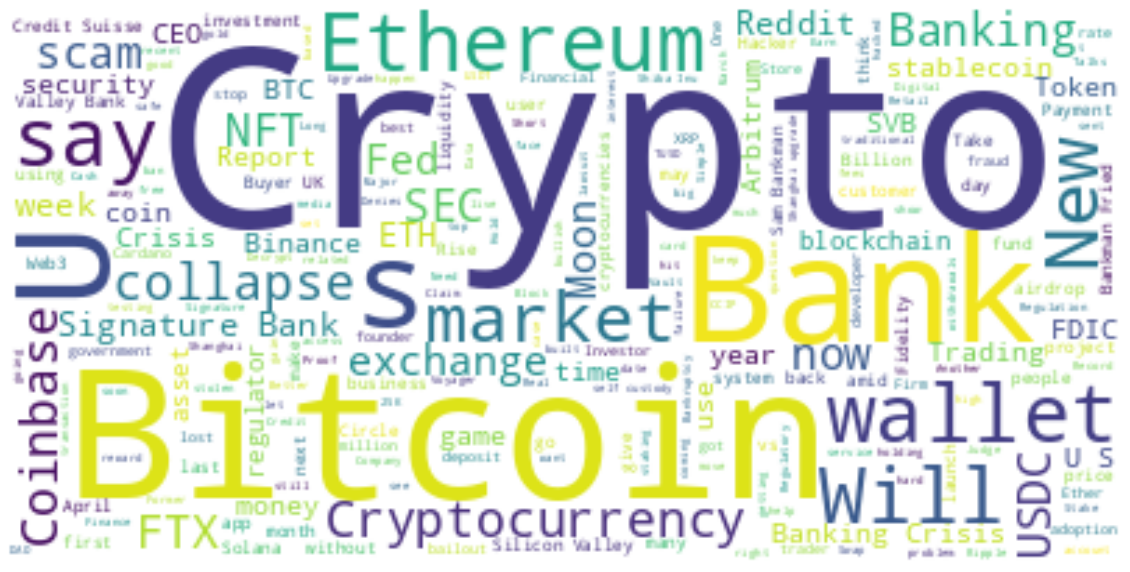

In [13]:
text = " ".join(i for i in df['headline'])
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white", max_words=300).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df2 = df[['headline','label']]
df.label.value_counts(normalize=True) * 100

 0    50.842266
 1    24.655436
-1    24.502297
Name: label, dtype: float64

In [15]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("Negative headlines:\n")
pprint(list(df[df['label'] == - 1].headline[:5]), width=200)

Positive headlines:

['Need help',
 "Less than $30B of stablecoins now sit on exchanges, wiping out all of 2022's gains",
 'How many coins are actually useful and actually solve a problem?',
 "Square Enix's NFT game will only let 3 people play the last mission",
 'Bitcoin has just perfectly bounced off the very trend-line we had been rejected last year in March at $48k. How the tables turned…']
Negative headlines:

['Federal judge blasts SEC for poorly argued attempts to claim cryptocurrencies must be regulated by them.',
 'Nottingham Forest supporting Gustavo Scarpa after he reportedly loses £1m in cryptocurrency scam',
 'A physical wallet is NOT the same thing as a cold wallet. A physical wallet will not mitigate your losses from scams and user errors.',
 'ChatGPT V4 aces the bar, SATs and can identify exploits in ETH contracts',
 'Circle announced they will no longer hold their money in banks after the issues they face the past week.']


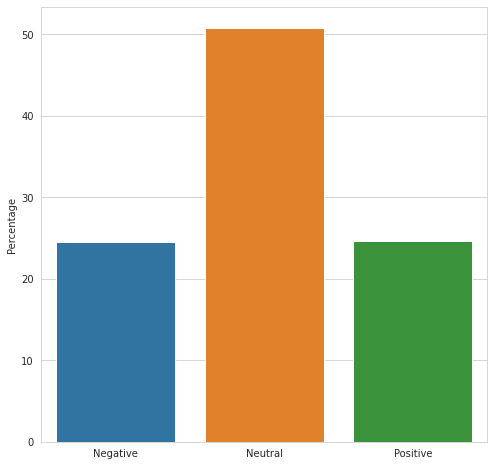

In [16]:
f, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [17]:
import re
df['headline_processed'] = df['headline'].map(lambda x : re.sub('[,\.!?]', '', x))
df['headline_processed'] = df['headline_processed'].map(lambda x : x.lower())
df.head()

,neg,neu,pos,compound,headline,label,headline_processed
0,0.0,1.000,0.000,0.0000,The DAO Makes a Holy Pilgrimage to Japan to Me...,0,the dao makes a holy pilgrimage to japan to me...
1,0.0,0.270,0.730,0.4019,Need help,1,need help
2,0.0,0.854,0.146,0.3400,Less than $30B of stablecoins now sit on excha...,1,less than $30b of stablecoins now sit on excha...
3,0.0,1.000,0.000,0.0000,Federal Reserve to launch instant payment serv...,0,federal reserve to launch instant payment serv...
4,0.0,1.000,0.000,0.0000,The Reddit app is suggesting to back up your v...,0,the reddit app is suggesting to back up your v...


In [18]:
import gensim 
from gensim.utils import simple_preprocess

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
stop_words = stopwords.words('english')
stop_words.extend(['bitcoin','crypto','bank','banking','could','say','give','banks','cryptocurrency'])

In [49]:
def sentence_to_words(stncs):
  for i in stncs:
    yield(simple_preprocess(str(i), deacc=True))

In [50]:
def rm_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if not word in stop_words] for doc in texts]

In [51]:
data = df.headline_processed.values.tolist()
data_words = list(sentence_to_words(data))

In [52]:
# remove stop words
data_words = rm_stopwords(data_words)
print(data_words[:1][0][:30])

['dao', 'makes', 'holy', 'pilgrimage', 'japan', 'meet', 'dogecoin', 'dog']


In [53]:
import gensim.corpora as corpora 
id2word = corpora.Dictionary(data_words)

In [54]:
txt = data_words
corpus = [id2word.doc2bow(text) for text in txt]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [57]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.019*"us" + 0.013*"crisis" + 0.013*"coinbase" + 0.006*"trading" + '
  '0.006*"eth" + 0.006*"without" + 0.006*"ceo" + 0.006*"exchanges" + '
  '0.005*"says" + 0.005*"ftx"'),
 (1,
  '0.009*"us" + 0.009*"fdic" + 0.007*"ethereum" + 0.007*"signature" + '
  '0.007*"buyers" + 0.006*"usdc" + 0.006*"new" + 0.005*"says" + '
  '0.004*"upgrade" + 0.004*"eth"'),
 (2,
  '0.007*"us" + 0.007*"usdc" + 0.007*"ever" + 0.006*"says" + 0.006*"reddit" + '
  '0.005*"week" + 0.005*"time" + 0.005*"way" + 0.005*"ethereum" + '
  '0.004*"best"'),
 (3,
  '0.009*"crisis" + 0.007*"us" + 0.007*"bailout" + 0.007*"microsoft" + '
  '0.007*"credit" + 0.006*"fed" + 0.006*"ceo" + 0.006*"svb" + 0.006*"wallet" + '
  '0.006*"edge"'),
 (4,
  '0.011*"nft" + 0.009*"us" + 0.009*"ethereum" + 0.007*"collapse" + '
  '0.007*"security" + 0.007*"silicon" + 0.007*"web" + 0.007*"valley" + '
  '0.005*"mass" + 0.005*"money"'),
 (5,
  '0.009*"wallet" + 0.008*"market" + 0.006*"sec" + 0.006*"next" + 0.006*"bull" '
  '+ 0.005*"us" + 0.0

In [28]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.150488 -0.079292       1        1  12.596731
2     -0.029204  0.049039       2        1  11.390294
3     -0.064123  0.010677       3        1  10.937981
1     -0.005831  0.081953       4        1  10.455792
9      0.117336 -0.055583       5        1   9.725025
5      0.043161 -0.116904       6        1   9.428920
7      0.013268  0.040713       7        1   9.416349
0      0.016927  0.001995       8        1   9.080270
6      0.032305 -0.024831       9        1   8.701650
4      0.026650  0.092233      10        1   8.266988, topic_info=          Term       Freq      Total Category  logprob  loglift
199     crisis  17.000000  17.000000  Default  30.0000  30.0000
135   collapse  15.000000  15.000000  Default  29.0000  29.0000
329   coinbase  15.000000  15.000000  Default  28.0000  28.0000
554       fdic   8.000000   8.000000  Default  27.0000  27.0000
694     credit  12.000000  12.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
111      first   1.387711   8.829428  Topic10  -5.6322   0.6425
120       time   1.387761   9.550964  Topic10  -5.6322   0.5639
229  signature   1.387799  15.093925  Topic10  -5.6321   0.1063
329   coinbase   1.387758  15.453029  Topic10  -5.6322   0.0828
75     trading   1.387752  11.472262  Topic10  -5.6322   0.3807

[699 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
130       1  0.360197   account
130       6  0.360197   account
2067      4  0.726145  achieved
1231      7  0.480295   actions
45        1  0.710278  actually
...     ...       ...       ...
933       3  0.357012   youtube
1411      8  0.745722       ytd
1311     10  0.744052  zenminer
845      10  0.744052  zeppelin
1850     10  0.744052      zone

[1274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 4, 2, 10, 6, 8, 1, 7, 5])